# Visualizacion de datos

## Cargo las librerías necesarias

In [1]:

import pandas as pd
import numpy as np
import sys
from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set(font_scale = 1.5)
sns.set_context("poster")
sns.set(rc={"figure.figsize": (24.,12.)})
sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')

### Cargo los datos limpios y me aseguro que sean los correctos

In [3]:
df = pd.read_csv("datos_limpios.csv")

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,1.076923
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,No,0,0.400000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,No,0,0.294737
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,No,0,0.358333
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,No,0,0.402174


In [5]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,1.243557,0.010309,0.444047
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441,6.856419,0.101140,0.311357
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061905
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274419
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518056
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,1.000000,2.637500


### Visulizamos los pairplots para encontrar alguna correlacion entre las variables según el tipo de gasolina

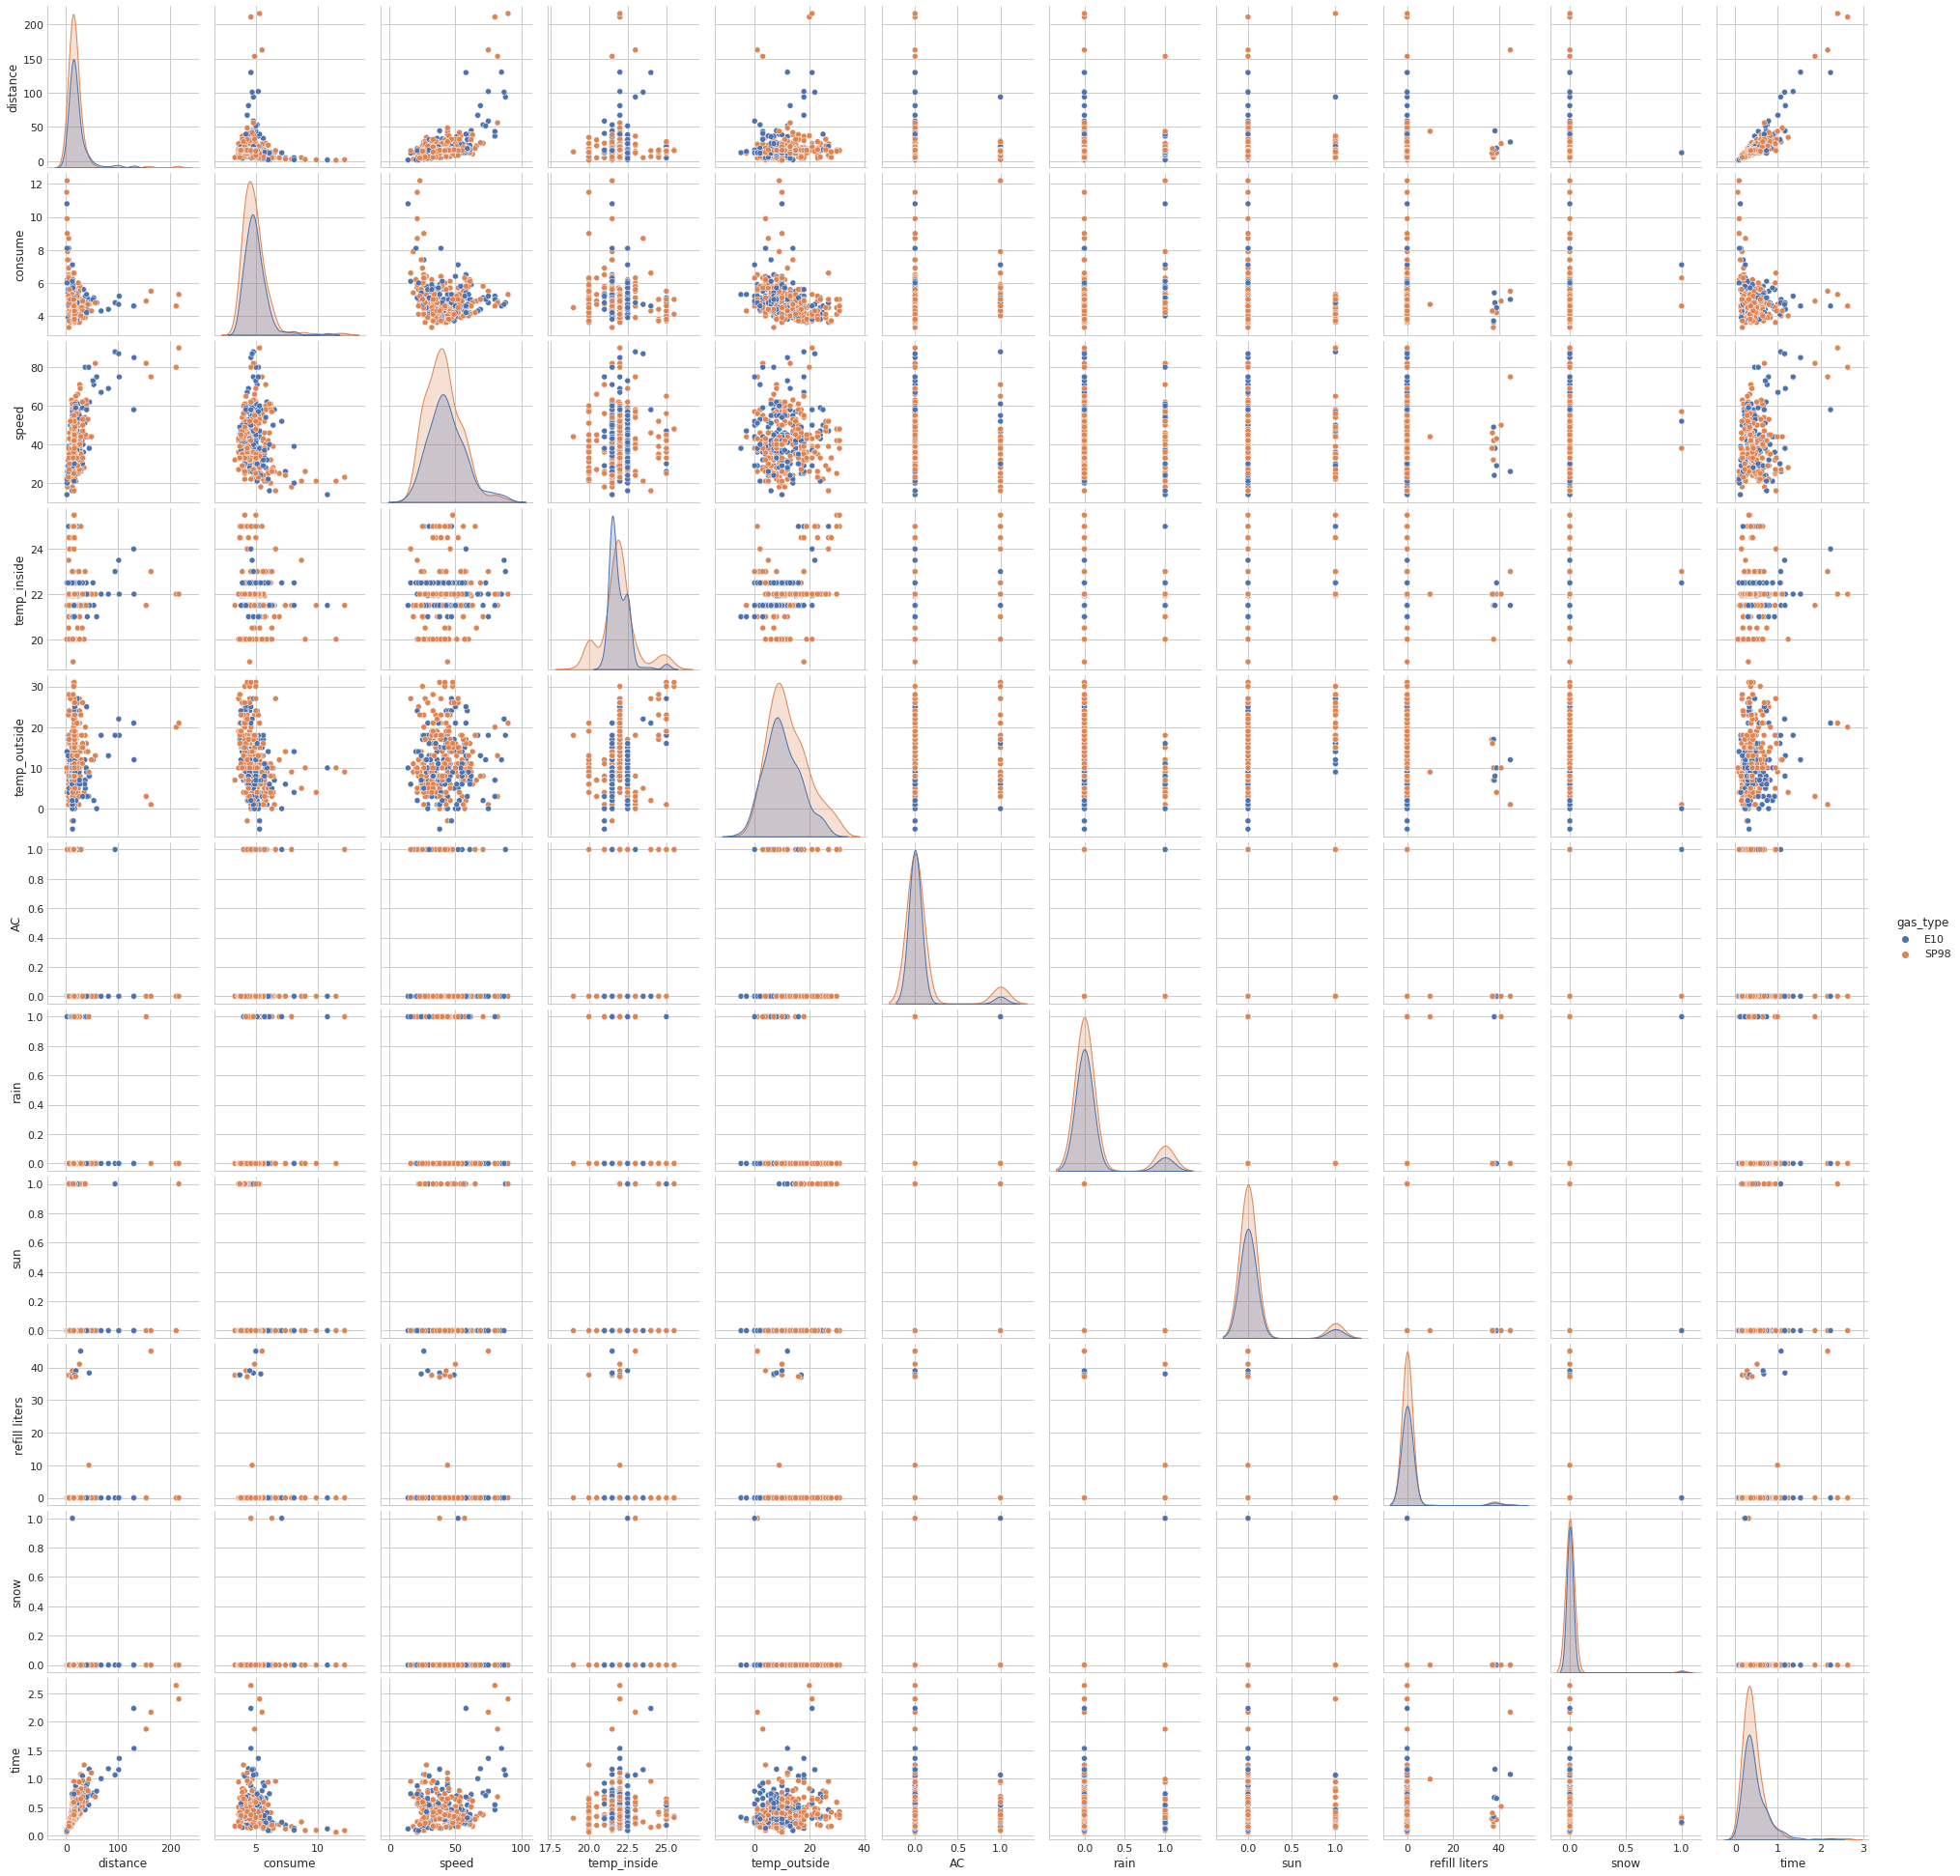

In [6]:
sns.pairplot(df, hue="gas_type")

In [7]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun', 'refill liters', 'refill gas', 'snow',
       'time'],
      dtype='object')

In [8]:
df_scater = df[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside','time', 'gas_type']]

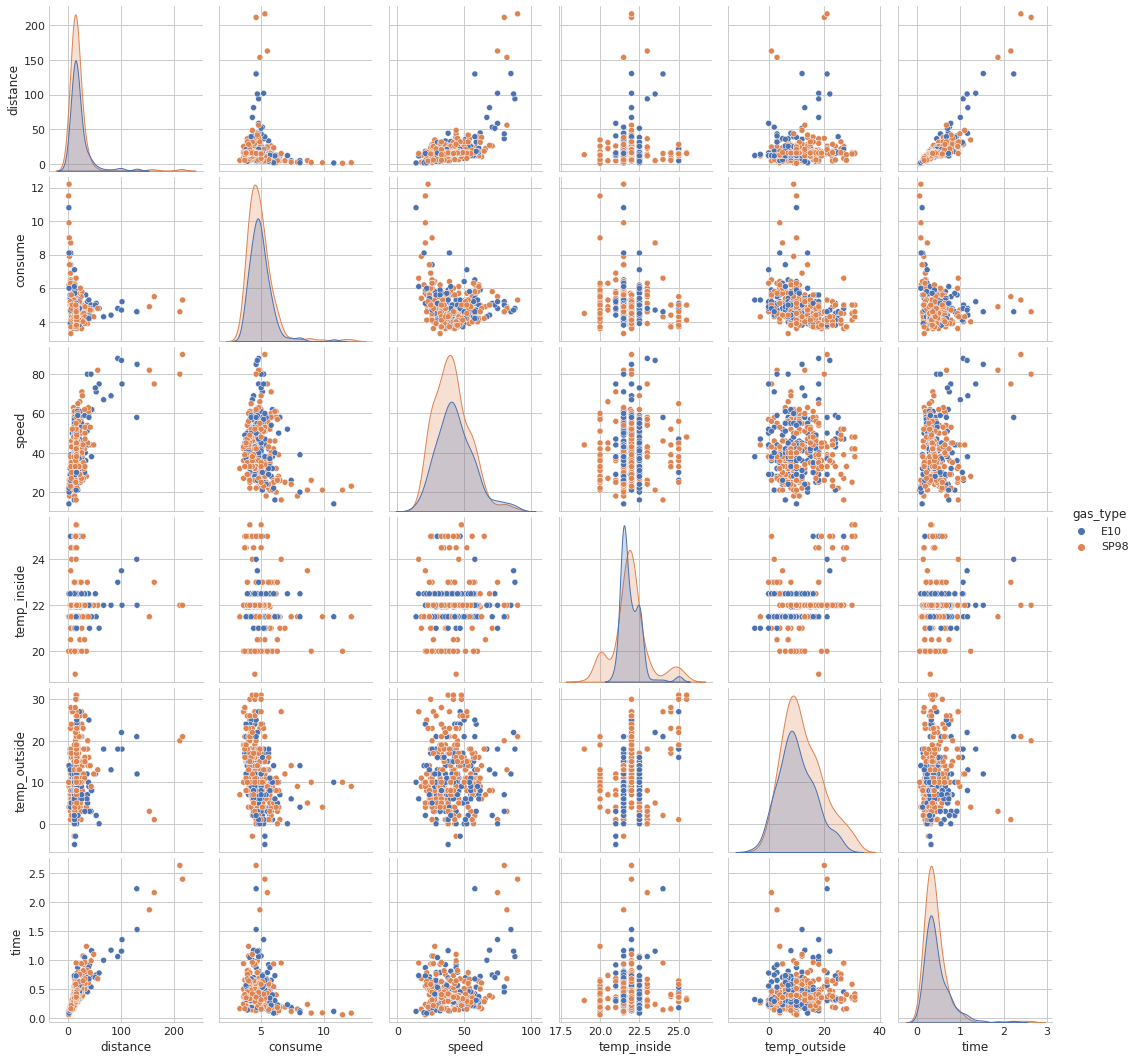

In [9]:
sns.pairplot(df_scater, hue="gas_type")

### Saco la matriz de correlacion y la grafico para ver más relaciones

In [10]:
corr=df.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,-0.033712,0.884942
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,0.072961,-0.177825
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,0.032481,0.245061
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,0.097140,0.067038
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,-0.162367,0.107179
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,0.065984,-0.009260
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,0.271633,-0.027300
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.030600,0.058150
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.018535,0.150026
snow,-0.033712,0.072961,0.032481,0.097140,-0.162367,0.065984,0.271633,-0.030600,-0.018535,1.000000,-0.056517


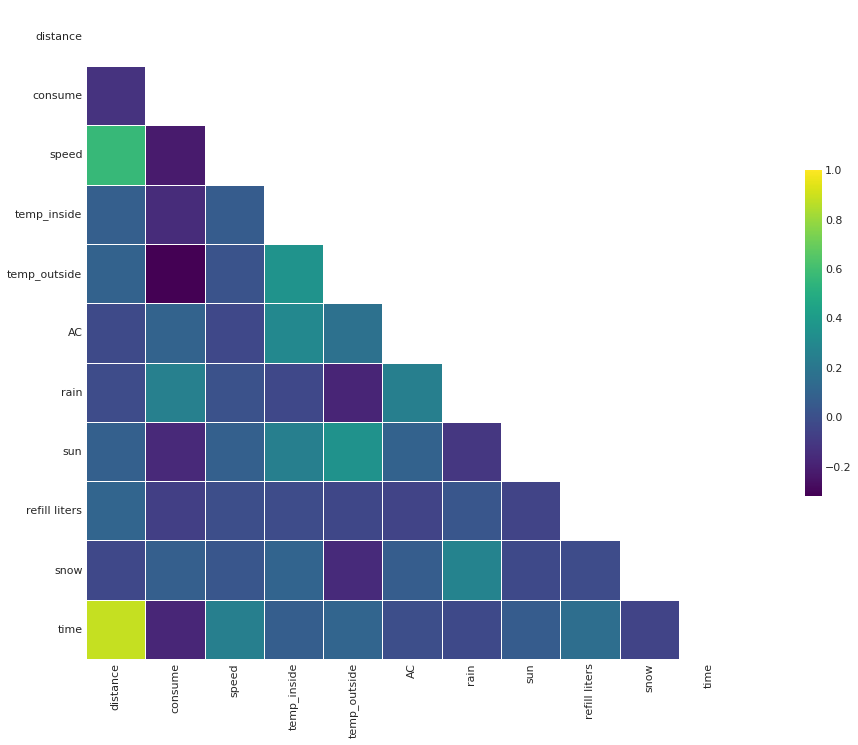

In [11]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

### Con la informacion anterior investigo posibles realciones visualmente

<AxesSubplot:xlabel='distance', ylabel='consume'>

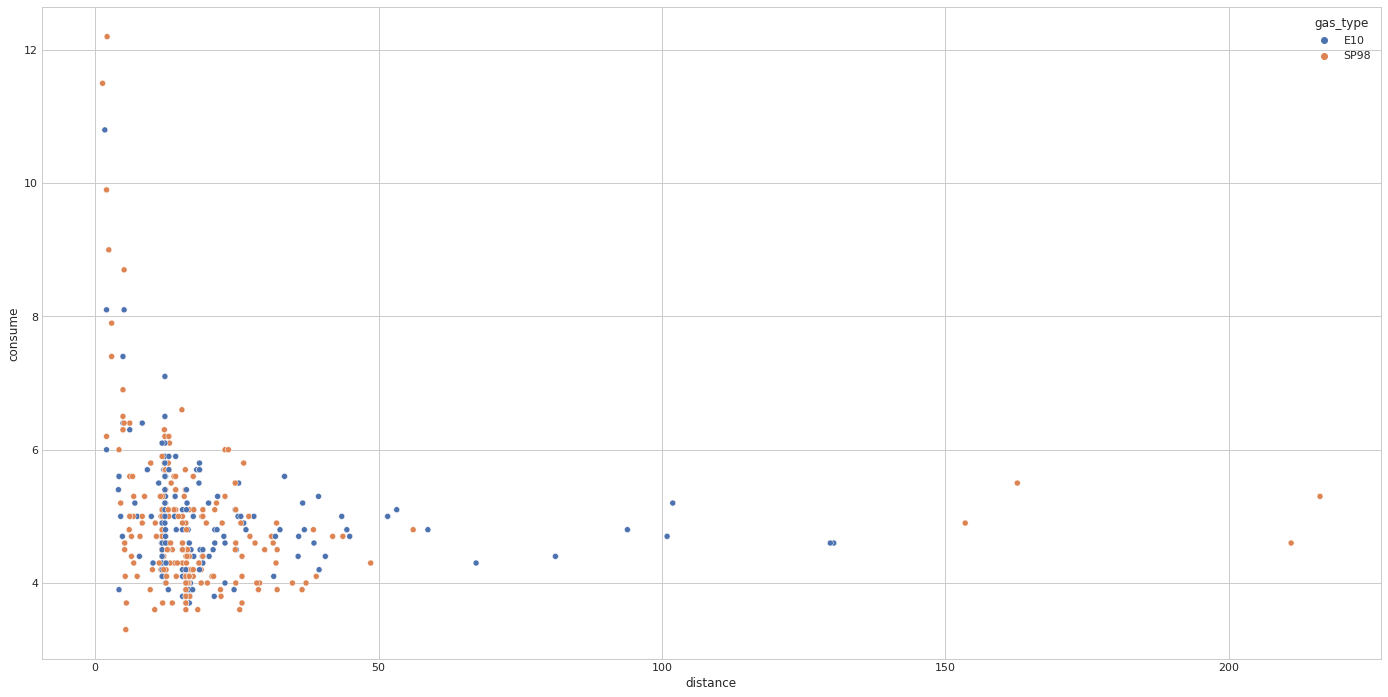

In [12]:
 sns.scatterplot(x="distance", y="consume", data=df, hue="gas_type")

### En esta gráfica podemos intuir que los consumos más altos en corta distancia son del SP98 pero en larga distancia tambien son los consumos mas bajos los del SP98

<AxesSubplot:xlabel='speed', ylabel='consume'>

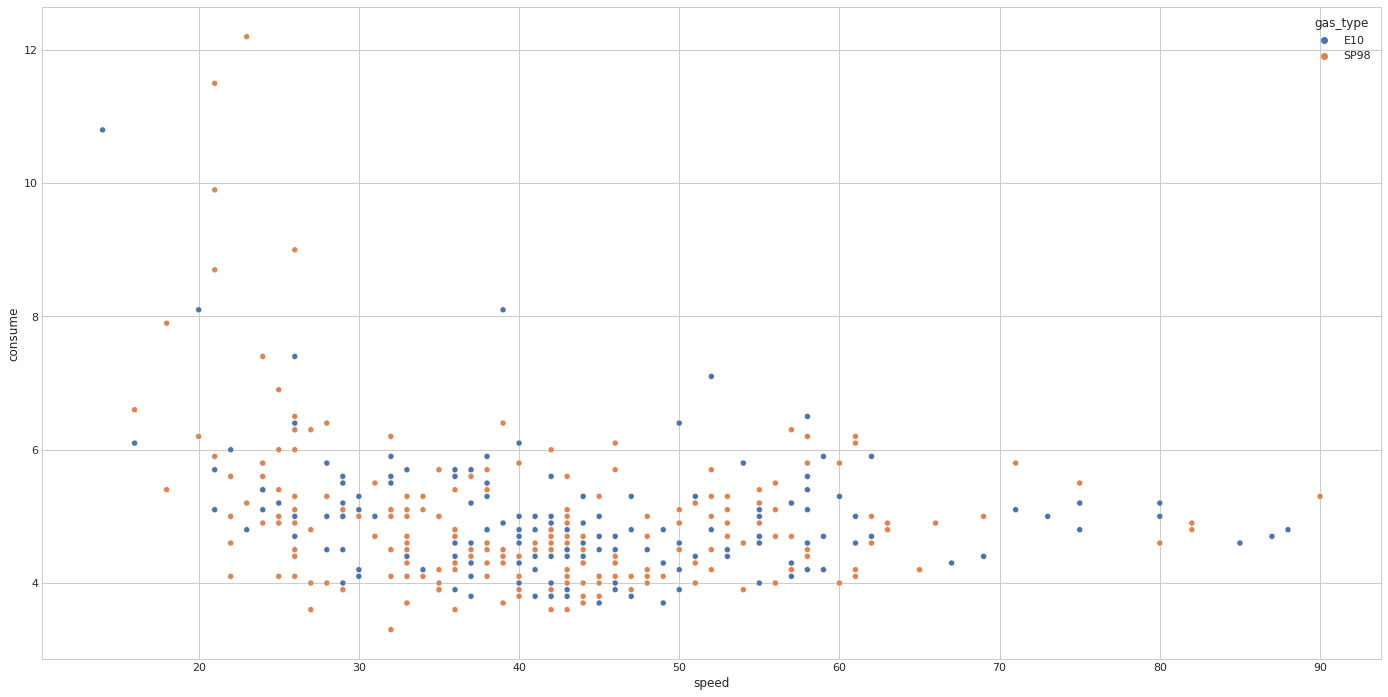

In [13]:
sns.scatterplot(x="speed", y="consume", data=df, hue="gas_type")

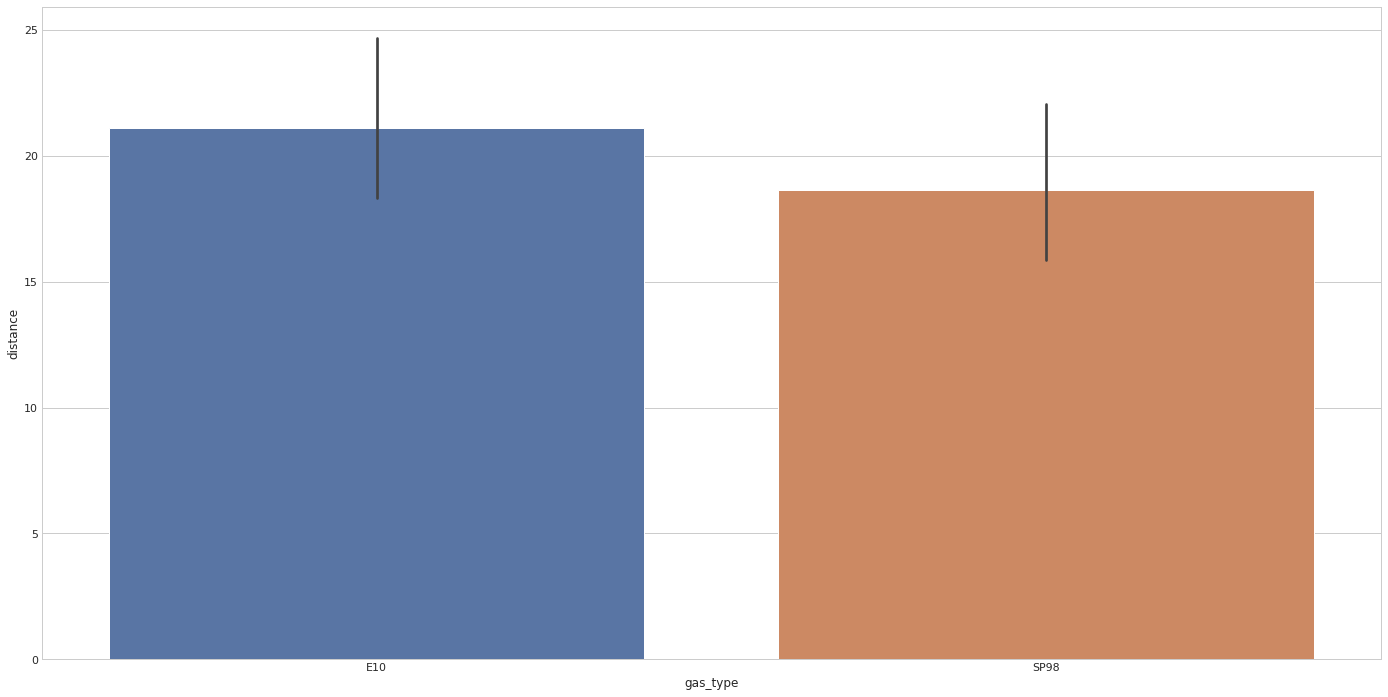

In [14]:
sns.barplot(x="gas_type", y="distance", data=df);

## Saco la distribución del cosumo 

### Global:

<AxesSubplot:xlabel='consume', ylabel='Count'>

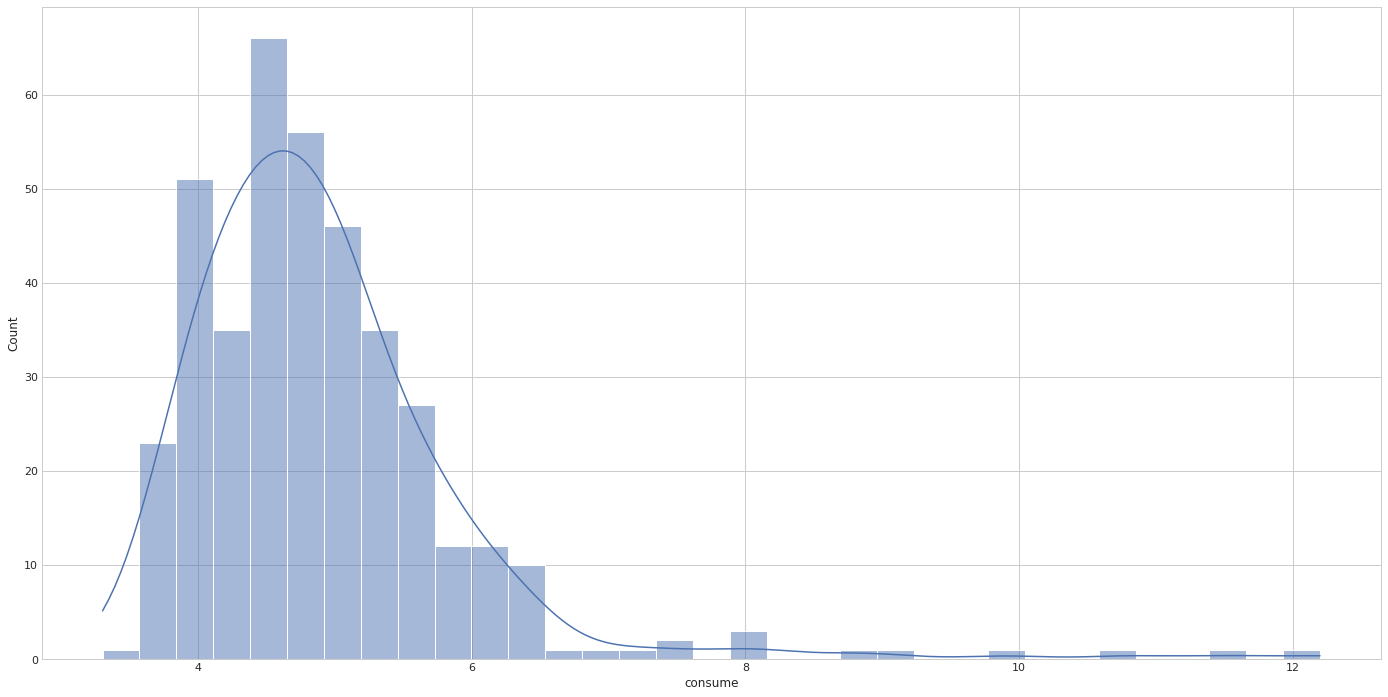

In [15]:
sns.histplot(x=df.consume, kde=True)

### Diferenciando por conbustible:

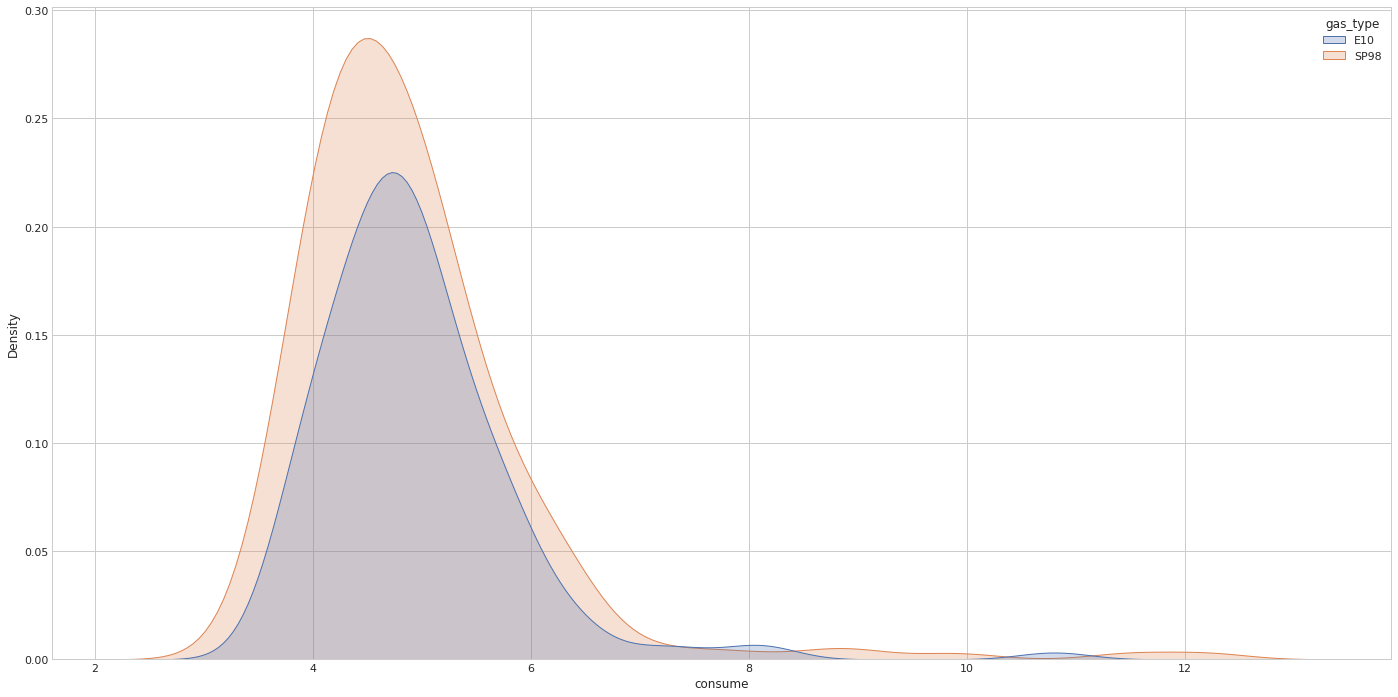

In [16]:
sns.kdeplot(x=df.consume, hue=df.gas_type, fill=True);

### Gráfica signifivativa en cuanto a consumo global comparando los dos tipos de combustible, el cosumo de SP89 es sensiblemente mayor independientemente de los demás condicionantes. Vamos a ver cuantos vehiculos de cada conbustible tenemos:

In [17]:
nv98 = len(df[df['gas_type']=='SP98'])
nv98

228

In [18]:
nv95 = len(df[df['gas_type']=='E10'])
nv95

160

## Hay diferencia significativa entre el número de vehiculos por tipo de conbustible. Para que las conparaciones sean adecuadas habrá que considerar las medias teniedo encuenta el numero de vehiculos 

Asi las medias globales de cosumo distancia y velocidad son las siguientes:

In [19]:
df[df['gas_type']=='SP98'].consume.mean()

4.899122807017544

In [20]:
df[df['gas_type']=='E10'].consume.mean()

4.93125

In [21]:
df[df['gas_type']=='SP98'].distance.mean()

18.639912280701754

In [22]:
df[df['gas_type']=='E10'].distance.mean()

21.09625

In [23]:
df[df['gas_type']=='SP98'].speed.mean()

40.82017543859649

In [24]:
df[df['gas_type']=='E10'].speed.mean()

43.50625

<AxesSubplot:xlabel='speed', ylabel='Count'>

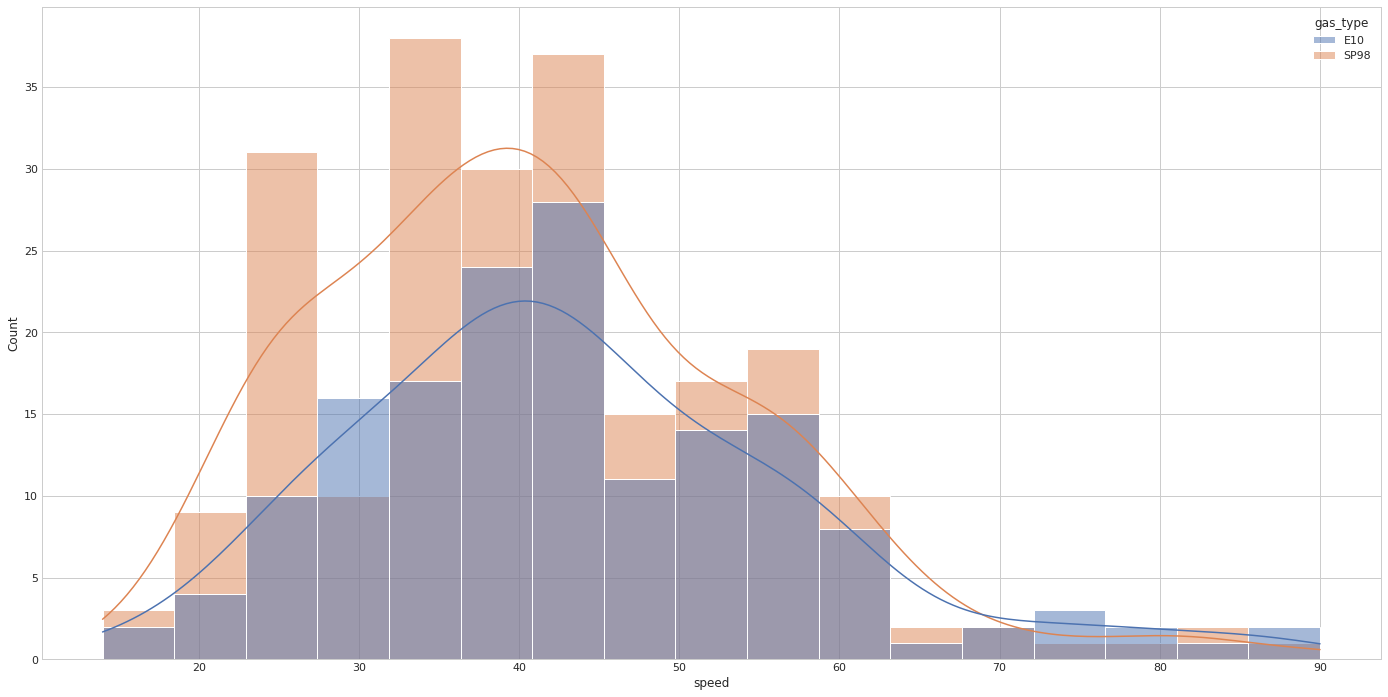

In [25]:
sns.histplot(data=df, x="speed", hue="gas_type",kde=True)

### como contrapartida los coches con SP95 parecen ser mucho más rápidos

# Estudio de la distancia recorrida 

<AxesSubplot:xlabel='distance', ylabel='Density'>

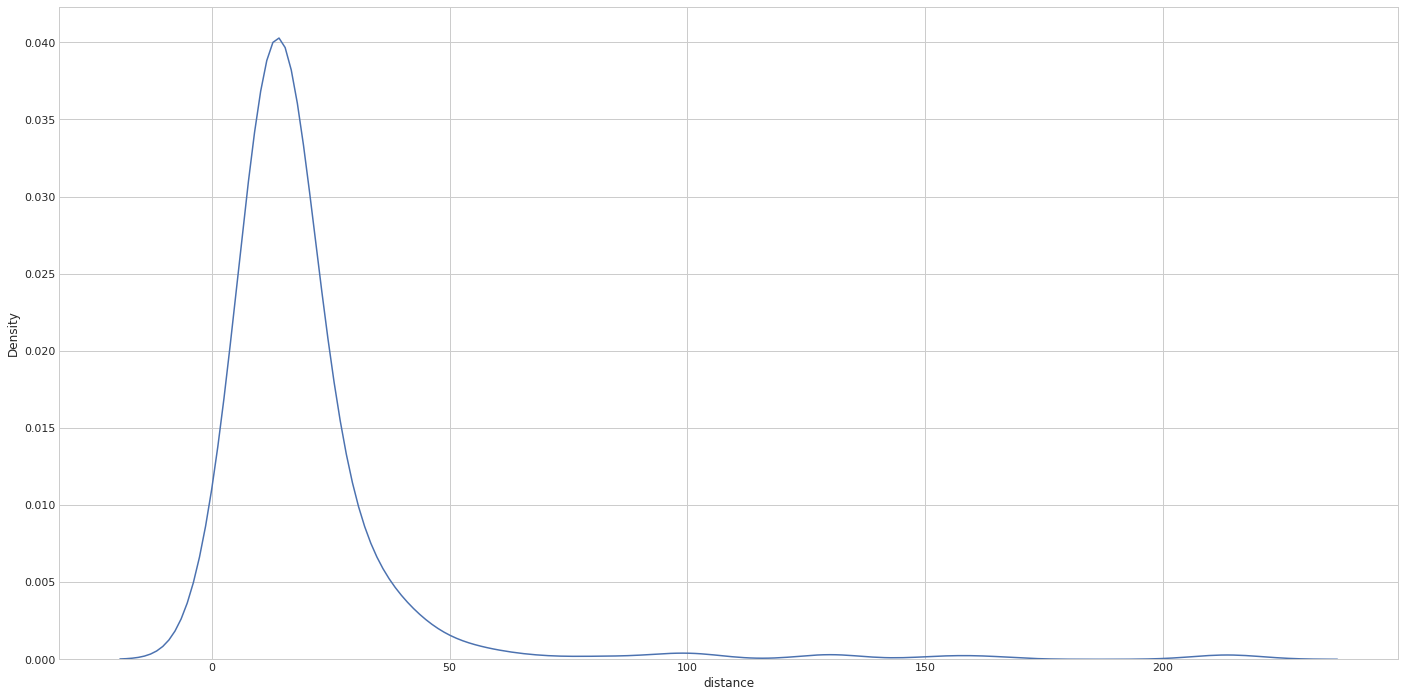

In [26]:
sns.kdeplot(x=df.distance)

## En función de la distancia tenemos una distribucion muy escorada a la derecha. Lo cual no es bueno para modelos predictivos. Estos suelen arrojar mejor resultado con una distibución normal. 

## Una opción se cambiar esta distribución a escala logaritmica para centrarla. 

## La opción que yo tomo es, dada la naturaleza del negocio; el transporte de viajeros, dividir el data set en varios para centrar la distribucion en cada uno de ellos.

In [27]:
df[df.distance>40]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
55,153.5,4.9,82,21.5,3,SP98,0,1,0,0.0,No,0,1.871951
106,162.7,5.5,75,23.0,1,SP98,0,0,0,45.0,SP98,0,2.169333
156,44.9,4.7,62,21.5,8,E10,0,0,0,0.0,No,0,0.724194
162,53.2,5.1,71,21.5,2,E10,0,0,0,0.0,No,0,0.749296
164,43.5,5.0,80,21.5,3,E10,0,0,0,0.0,No,0,0.543750
171,44.4,4.8,38,21.5,8,E10,0,0,0,38.3,E10,0,1.168421
175,40.6,4.4,44,21.0,3,E10,0,0,0,0.0,No,0,0.922727
178,58.7,4.8,75,21.0,0,E10,0,0,0,0.0,No,0,0.782667
185,51.6,5.0,73,22.5,12,E10,0,0,0,0.0,No,0,0.706849
188,81.2,4.4,69,22.0,13,E10,0,0,0,0.0,No,0,1.176812


## Creo tres data frames en funcion de la distancia, para corta distancia <30 km df_cd y para larga media >50 km df_md para media distanciaca y el restos df_ld para larga distancia  

In [28]:
df_cd = df[df.distance<=30]

In [29]:
df_resto = df[df.distance>30]

In [30]:
df_md = df_resto[df_resto.distance<=50]

In [31]:
df_ld = df_resto[df_resto.distance >50]

<AxesSubplot:xlabel='distance', ylabel='Density'>

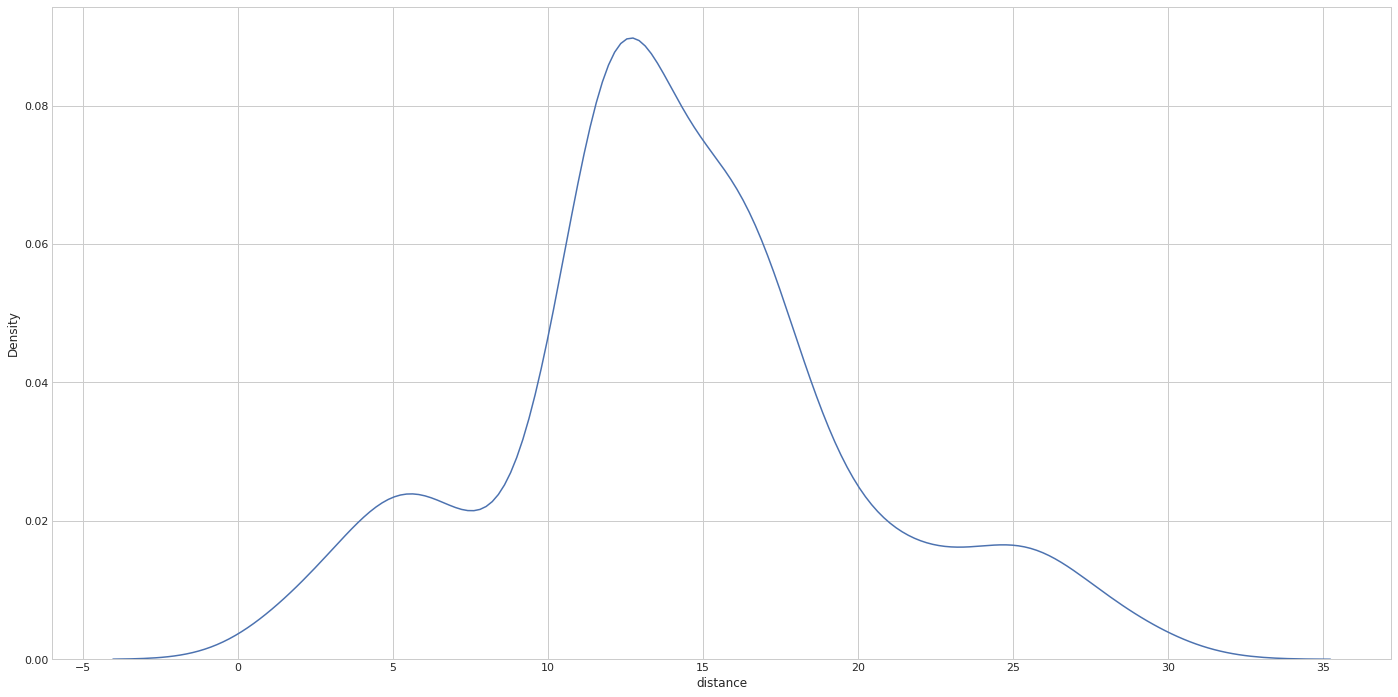

In [32]:
sns.kdeplot(x=df_cd.distance)

<AxesSubplot:xlabel='distance', ylabel='Density'>

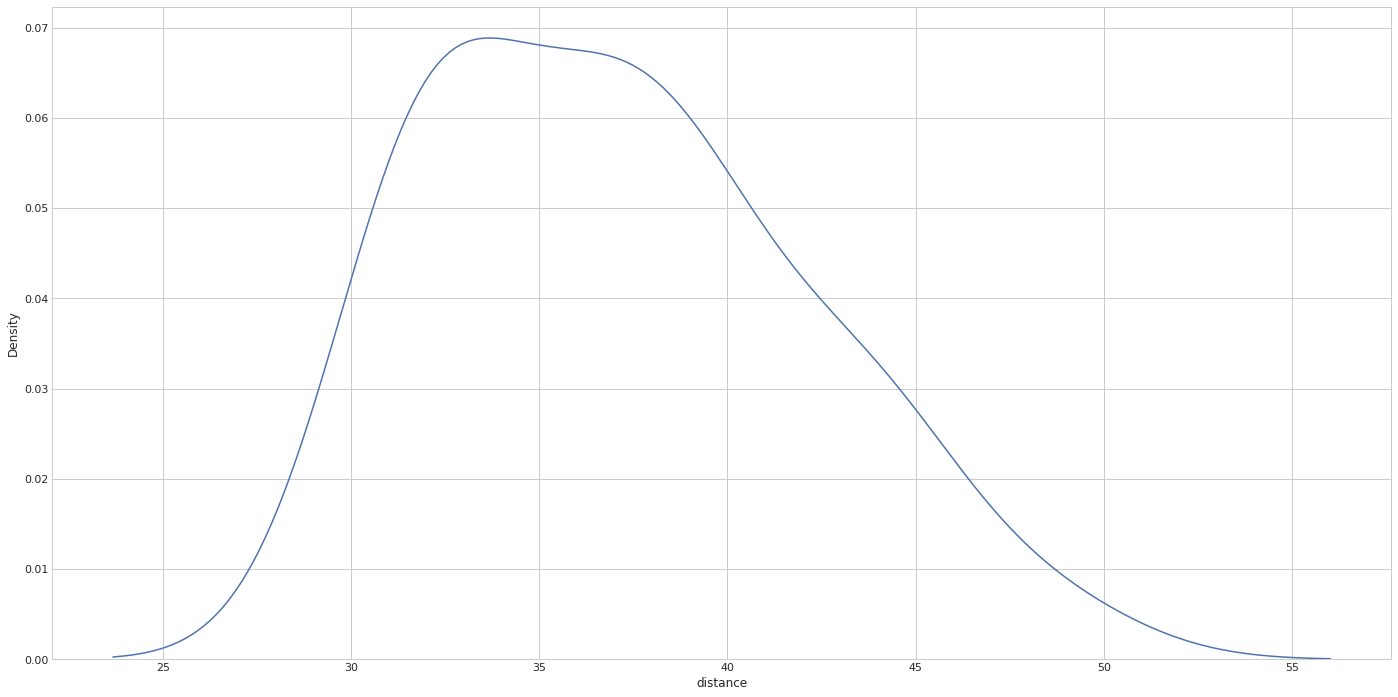

In [33]:
sns.kdeplot(x=df_md.distance)

<AxesSubplot:xlabel='distance', ylabel='Density'>

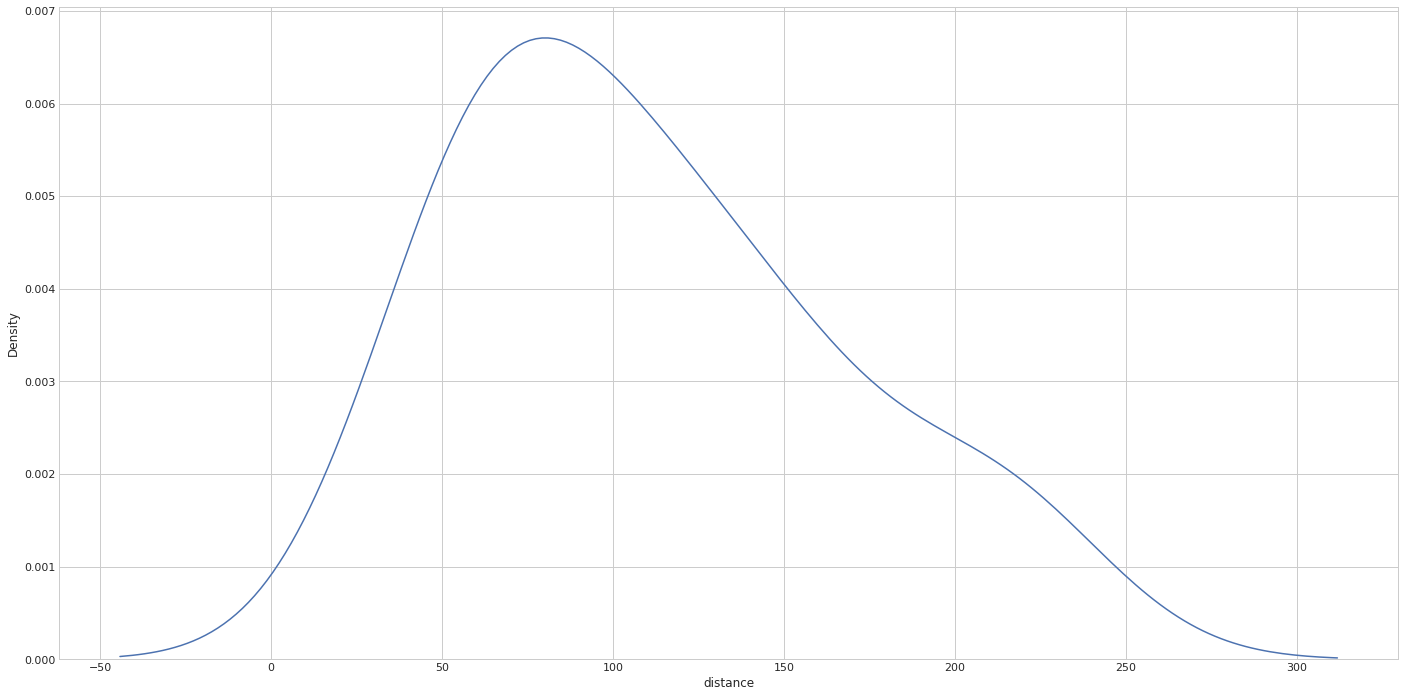

In [34]:
sns.kdeplot(x=df_ld.distance)

## Ahora tenemos tres data frames con una distribucion relativamente normal / simetrica encuanto a distancia. Pero cómo está distribuido el consumo:

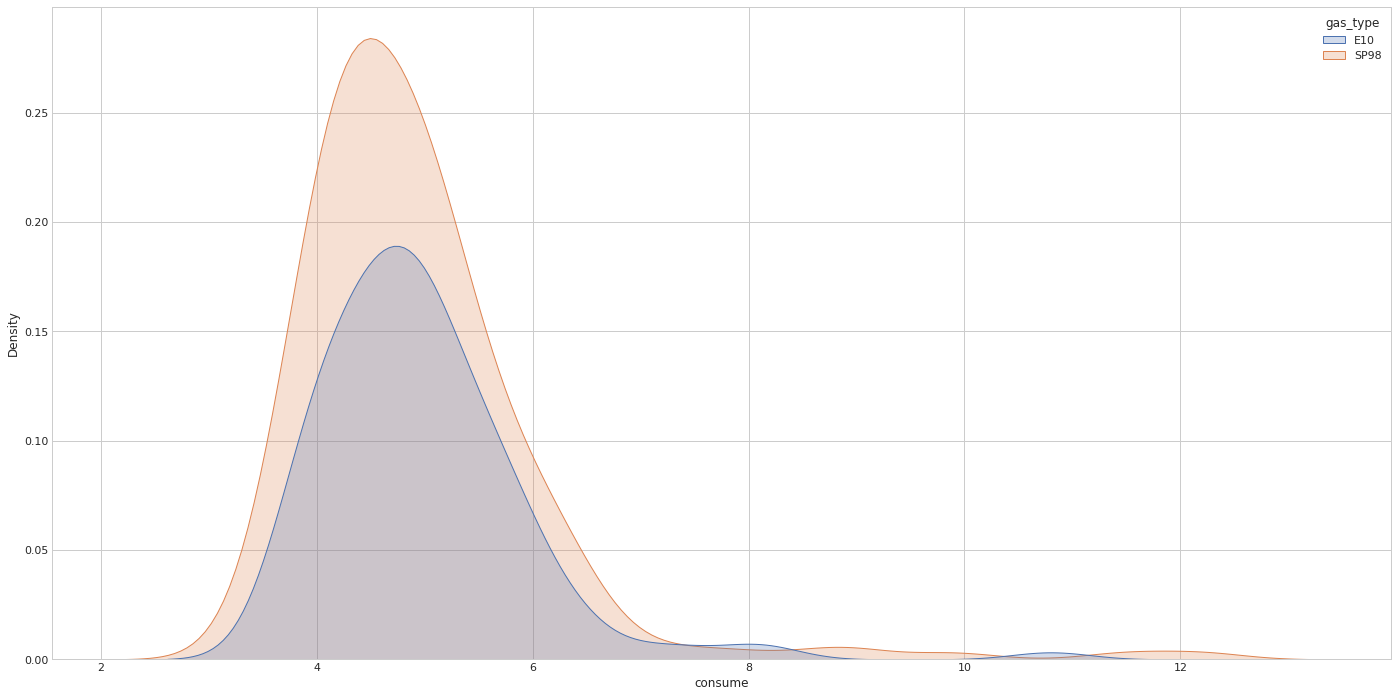

In [35]:
sns.kdeplot(x=df_cd.consume, hue=df_cd.gas_type, fill=True);

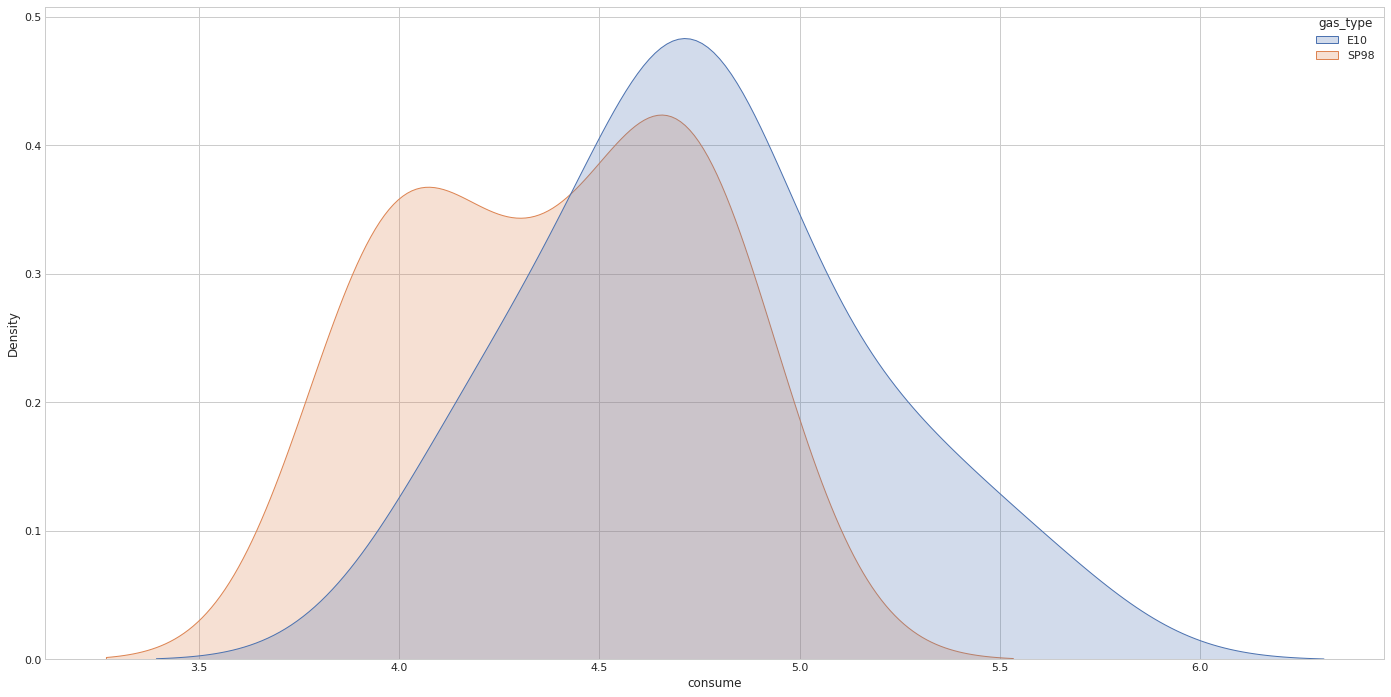

In [36]:
sns.kdeplot(x=df_md.consume, hue=df_md.gas_type, fill=True);

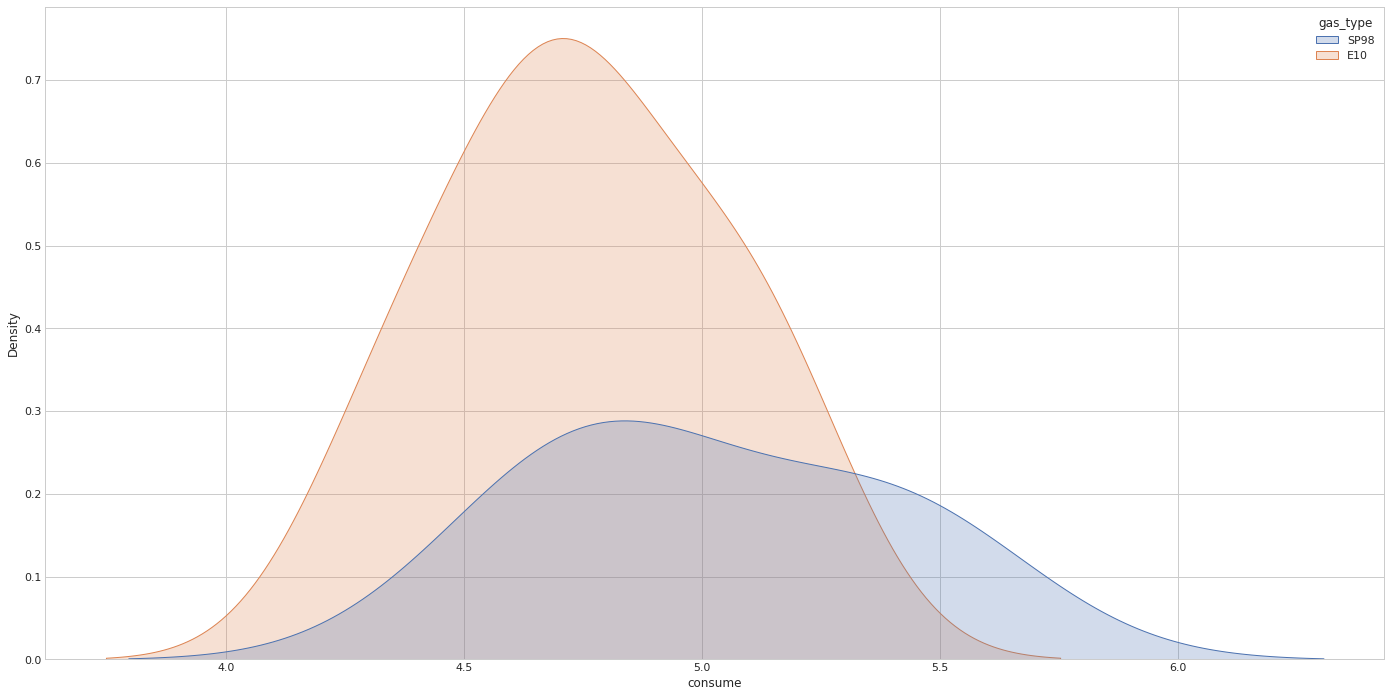

In [37]:
sns.kdeplot(x=df_ld.consume, hue=df_ld.gas_type, fill=True);

## En cuanto a consumo la distribucion sigue escorada a la izquierda, voy a examinar mejor esos casos de alto consumo en corta distancia. Estos valores que rompen la simetria de la distirbución de consumos son los superiores a 7.5 y son los siguientes:

In [38]:
df_cd_ac = df_cd[df_cd.consume>7.5]
df_cd_ac

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
45,2.0,9.9,21,21.5,4,SP98,0,0,0,0.0,No,0,0.095238
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0.0,No,0,0.161111
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0.0,No,0,0.091304
112,5.1,8.7,21,23.5,5,SP98,0,0,0,0.0,No,0,0.242857
147,1.7,10.8,14,21.5,10,E10,0,1,0,0.0,No,0,0.121429
160,5.1,8.1,39,21.5,4,E10,0,0,0,0.0,No,0,0.130769
206,2.4,9.0,26,20.0,10,SP98,0,0,0,0.0,No,0,0.092308
210,1.3,11.5,21,20.0,10,SP98,0,0,0,0.0,No,0,0.061905
254,2.0,8.1,20,22.5,14,E10,0,0,0,0.0,No,0,0.100000


## Estos consumos altos parecen porducirse en recorridos cortos <5.1 por lo que pododemos achacarlos principalmente a retenciones. Esta problematica escapa de la catidad de datos proporcionados por el estudio.  

In [39]:
df_cd.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,1.076923
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,No,0,0.400000
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,No,0,0.294737
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,No,0,0.358333
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,No,0,0.402174


## Examinando los tiempos de recorrido, general y por distancia

In [40]:
df.time.mean()

0.4440467766320883

In [41]:
df_cd.time.mean() ## Corta distancia

0.3725396595057828

In [42]:
df_md.time.mean() ## Media distancia 

0.779283645636246

In [43]:
df_ld.time.mean() ## Larga distancia

1.4358187159873217

## Examinando los tiempos de recorrido por distancia en recorrido con alto consumo >6

In [44]:
df_cd[df_cd.consume>6].time.mean() 

0.22401863930805951

In [45]:
df_md[df_md.consume>6].time.mean() ## no existe alto consumo en media distancia en nuestros datos.

nan

In [46]:
df_ld[df_ld.consume>6].time.mean()  ## no existe alto consumo en larga distancia en nuestos datos.

nan

In [47]:
df_cd[df_cd.consume>6]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time
5,8.3,6.4,50,21.5,10,E10,0,0,0,0.0,No,0,0.166000
8,4.9,6.4,26,21.5,4,E10,0,0,0,0.0,No,0,0.188462
37,4.9,7.4,26,21.5,6,E10,0,0,0,0.0,No,0,0.188462
39,12.3,6.5,58,21.5,7,E10,0,0,0,0.0,No,0,0.212069
45,2.0,9.9,21,21.5,4,SP98,0,0,0,0.0,No,0,0.095238
53,13.1,6.1,46,21.5,6,SP98,0,1,0,0.0,No,0,0.284783
54,6.1,6.4,28,21.5,8,SP98,0,0,0,0.0,No,0,0.217857
57,12.3,6.2,61,21.5,8,SP98,0,0,0,0.0,No,0,0.201639
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0.0,No,0,0.161111
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0.0,No,0,0.091304


In [48]:
df_cd[df_cd.consume>6].time.mean() ## CD y alto consumo AC en tiempo medio.

0.22401863930805951

In [49]:
df_cd[df_cd.consume>6].speed.mean() ## CD y AC en velocidad media 

32.59375

In [50]:
df_cd[df_cd.consume>6].consume.mean() ## CD y AC en consumo medio.

7.33125

In [51]:
df_cd[df_cd.consume>6].consume.max() ## CD y AC en consumo máximo

12.2

## Considero adecuado crear una nueva columna que relacione el consumo por ditancia (litros/100 km) o (galones / 100 millas)[carezco de unidades] para realizar una comparación más adecuada. Para ello creo la siguiente funcion:


In [52]:
def lkm(consumo, distancia):
    return consumo/distancia*100

In [53]:
df_cd['lkm'] = df_cd.apply(lambda dff: round(100* (dff["consume"] / dff["distance"]),2), axis=1)


/tmp/ipykernel_400/2380264311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd['lkm'] = df_cd.apply(lambda dff: round(100* (dff["consume"] / dff["distance"]),2), axis=1)


In [54]:
df_cd.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time,lkm
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10,0,1.076923,17.86
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,No,0,0.400000,35.00
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,No,0,0.294737,49.11
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,No,0,0.358333,30.23
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,No,0,0.402174,24.32


In [55]:
df_cd.lkm.describe()

count    344.000000
mean      52.537703
std       80.583809
min       13.540000
25%       24.815000
50%       35.445000
75%       43.972500
max      884.620000
Name: lkm, dtype: float64

<AxesSubplot:xlabel='lkm', ylabel='Density'>

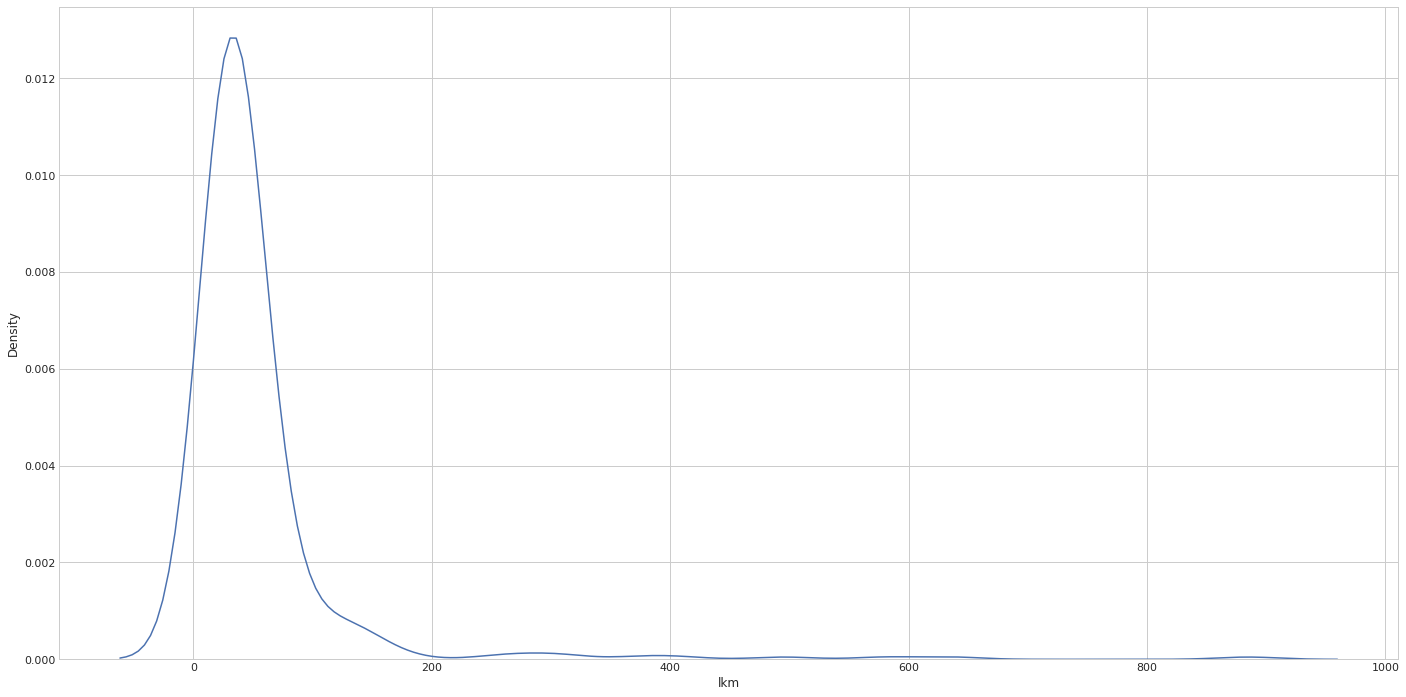

In [56]:
sns.kdeplot(x=df_cd.lkm)

<AxesSubplot:xlabel='lkm', ylabel='Density'>

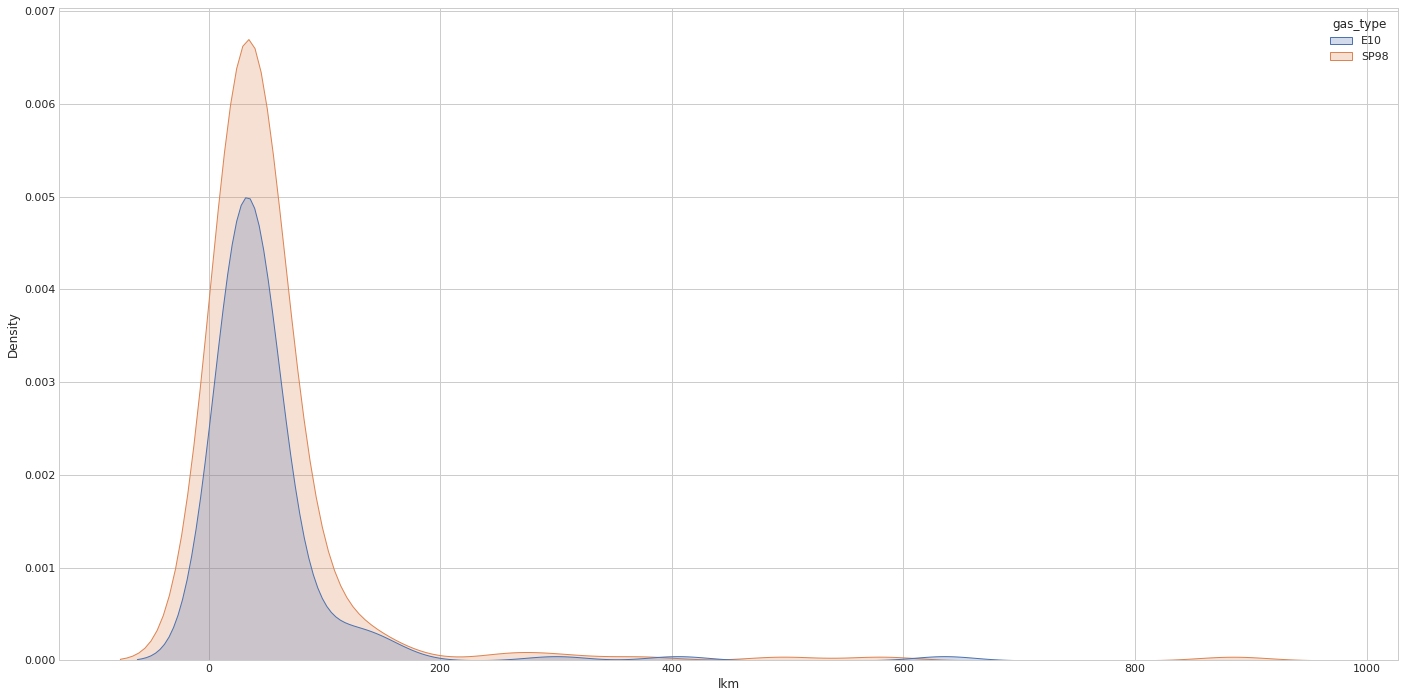

In [57]:
sns.kdeplot(x=df_cd.lkm, hue=df_cd.gas_type, fill=True)

In [58]:
df_cd_extra = df_cd[df_cd.lkm>100] ## consumos extraordinarios
df_cd_extra

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time,lkm
8,4.9,6.4,26,21.5,4,E10,0,0,0,0.0,No,0,0.188462,130.61
37,4.9,7.4,26,21.5,6,E10,0,0,0,0.0,No,0,0.188462,151.02
41,4.5,5.0,29,21.5,7,E10,1,0,0,0.0,No,0,0.155172,111.11
45,2.0,9.9,21,21.5,4,SP98,0,0,0,0.0,No,0,0.095238,495.00
54,6.1,6.4,28,21.5,8,SP98,0,0,0,0.0,No,0,0.217857,104.92
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0.0,No,0,0.161111,272.41
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0.0,No,0,0.091304,580.95
71,2.0,6.2,20,21.5,10,SP98,0,0,0,0.0,No,0,0.100000,310.00
103,4.9,6.9,25,21.0,12,SP98,0,1,0,0.0,No,0,0.196000,140.82
107,4.9,6.5,26,21.0,1,SP98,0,0,0,0.0,No,0,0.188462,132.65


In [59]:
df_cd = df_cd[df_cd.lkm<=100]

<AxesSubplot:xlabel='lkm', ylabel='Density'>

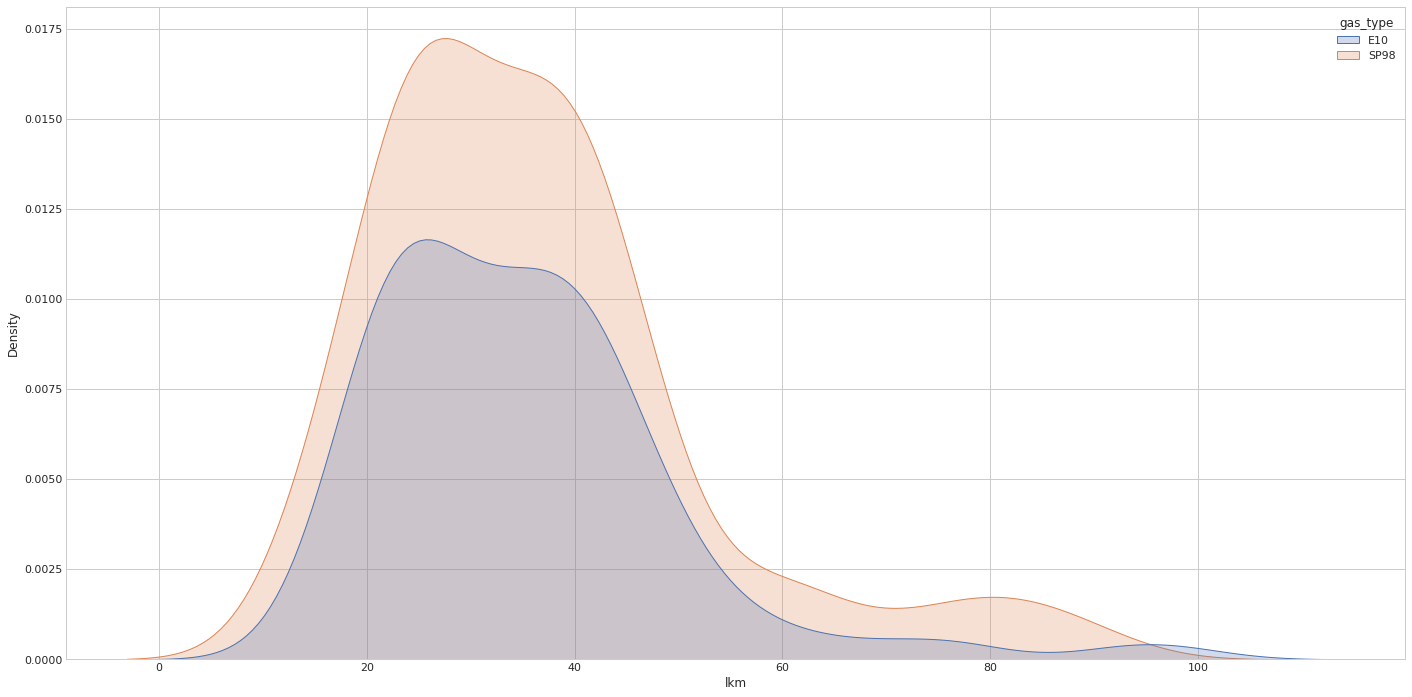

In [60]:
sns.kdeplot(x=df_cd.lkm, hue=df_cd.gas_type, fill=True)

In [61]:
df_cd.sample(3)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time,lkm
295,12.7,4.5,39,22.0,27,SP98,0,0,1,0.0,No,0,0.325641,35.43
166,16.4,4.8,49,21.5,5,E10,0,0,0,0.0,No,0,0.334694,29.27
12,12.3,5.9,59,21.5,10,E10,0,0,0,0.0,No,0,0.208475,47.97


<AxesSubplot:xlabel='consume', ylabel='Density'>

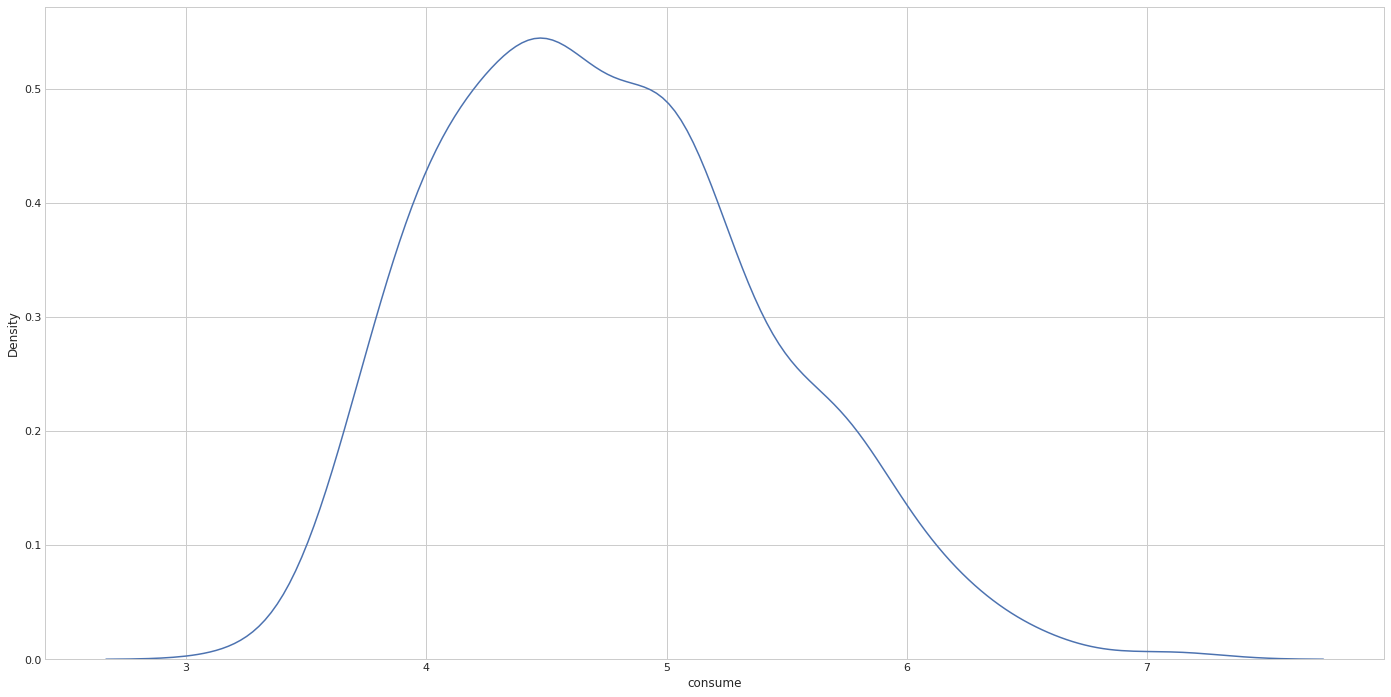

In [62]:
sns.kdeplot(x=df_cd.consume)

In [63]:
df_cd[df_cd.consume>7]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,time,lkm
181,12.3,7.1,52,22.5,0,E10,1,1,0,0.0,No,1,0.236538,57.72


In [64]:
df_cd_scater = df_cd[['distance', 'consume', 'speed','time', 'gas_type','lkm']]

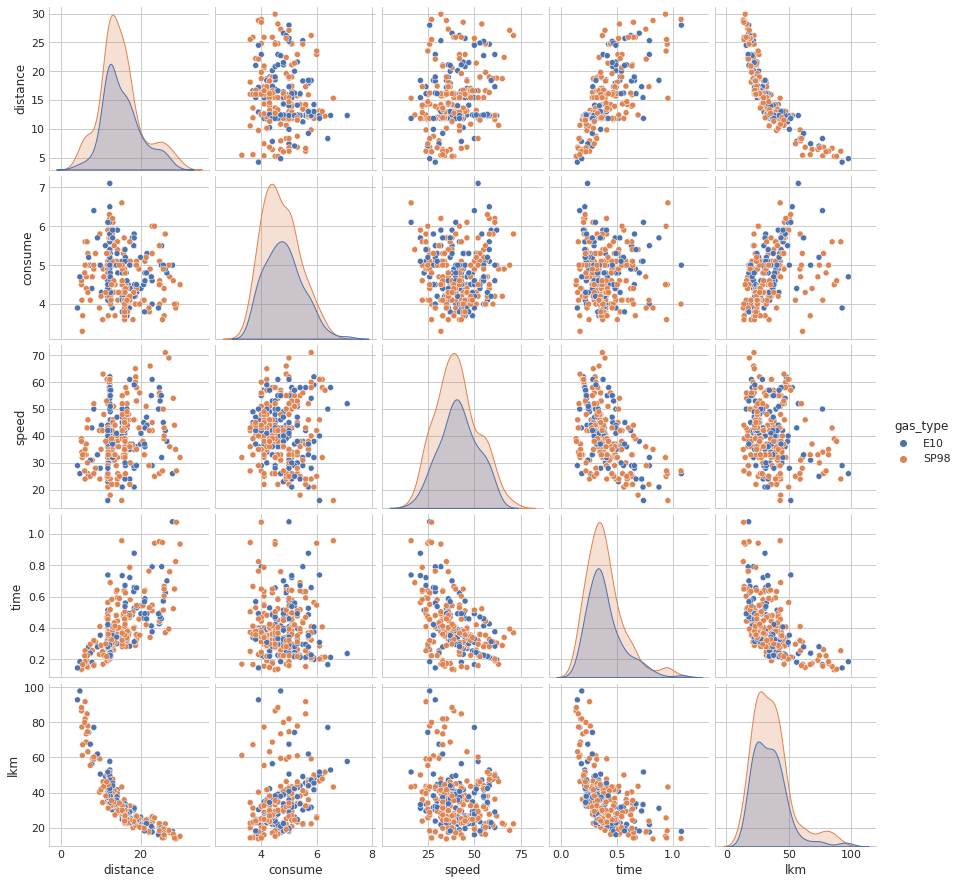

In [65]:
sns.pairplot(df_cd_scater, hue="gas_type")

In [66]:
df_cd.to_csv("cd_limpios.csv", index=False)

In [67]:
df_md.to_csv("md_limpios.csv", index=False)

In [68]:
df_ld.to_csv("ld_limpios.csv", index=False)

In [69]:
corr=df_cd.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time,lkm
distance,1.000000,-0.140433,0.173318,0.039615,0.108875,0.077584,-0.002833,0.030548,0.054856,-0.064998,0.694586,-0.834332
consume,-0.140433,1.000000,-0.016549,-0.116841,-0.429367,0.077692,0.297883,-0.210048,-0.108789,0.153844,-0.012421,0.398376
speed,0.173318,-0.016549,1.000000,-0.005484,-0.041421,-0.014910,0.040765,0.070597,-0.053164,0.056006,-0.525091,-0.201721
temp_inside,0.039615,-0.116841,-0.005484,1.000000,0.345859,0.331952,-0.024797,0.242322,-0.046005,0.099292,0.012509,-0.025290
temp_outside,0.108875,-0.429367,-0.041421,0.345859,1.000000,0.194497,-0.198193,0.335074,-0.013205,-0.178522,0.107119,-0.154399
AC,0.077584,0.077692,-0.014910,0.331952,0.194497,1.000000,0.232636,0.078245,-0.053849,0.069206,0.094169,-0.047130
rain,-0.002833,0.297883,0.040765,-0.024797,-0.198193,0.232636,1.000000,-0.113587,0.041666,0.297487,0.001415,0.053032
sun,0.030548,-0.210048,0.070597,0.242322,0.335074,0.078245,-0.113587,1.000000,-0.053849,-0.033791,-0.017371,-0.033354
refill liters,0.054856,-0.108789,-0.053164,-0.046005,-0.013205,-0.053849,0.041666,-0.053849,1.000000,-0.020366,0.092749,-0.062313
snow,-0.064998,0.153844,0.056006,0.099292,-0.178522,0.069206,0.297487,-0.033791,-0.020366,1.000000,-0.080666,0.079401


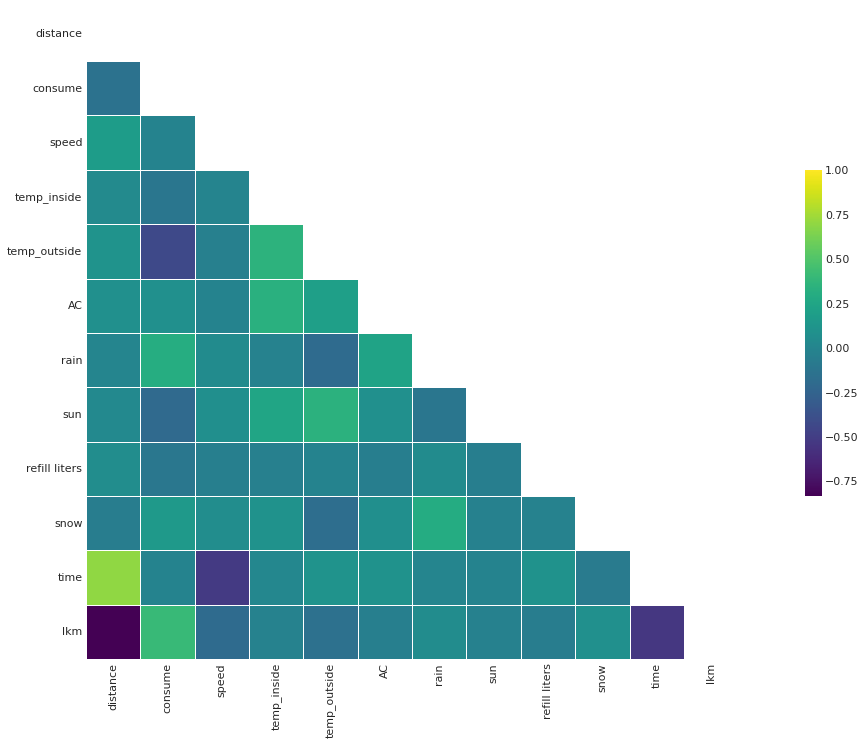

In [70]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

In [71]:
corr=df_md.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time
distance,1.000000,0.077469,0.243282,-0.059170,-0.127308,NaN,0.198774,-0.145620,0.348653,NaN,0.253348
consume,0.077469,1.000000,0.320033,-0.219997,-0.588695,NaN,0.404223,-0.474276,0.114746,NaN,-0.251920
speed,0.243282,0.320033,1.000000,0.170701,-0.042921,NaN,0.300200,-0.197533,-0.205151,NaN,-0.837193
temp_inside,-0.059170,-0.219997,0.170701,1.000000,0.495894,NaN,-0.052385,0.422354,-0.060513,NaN,-0.280741
temp_outside,-0.127308,-0.588695,-0.042921,0.495894,1.000000,NaN,-0.152790,0.373835,-0.109351,NaN,-0.111840
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rain,0.198774,0.404223,0.300200,-0.052385,-0.152790,NaN,1.000000,-0.115385,0.079131,NaN,-0.132145
sun,-0.145620,-0.474276,-0.197533,0.422354,0.373835,NaN,-0.115385,1.000000,-0.079022,NaN,0.123110
refill liters,0.348653,0.114746,-0.205151,-0.060513,-0.109351,NaN,0.079131,-0.079022,1.000000,NaN,0.415618
snow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


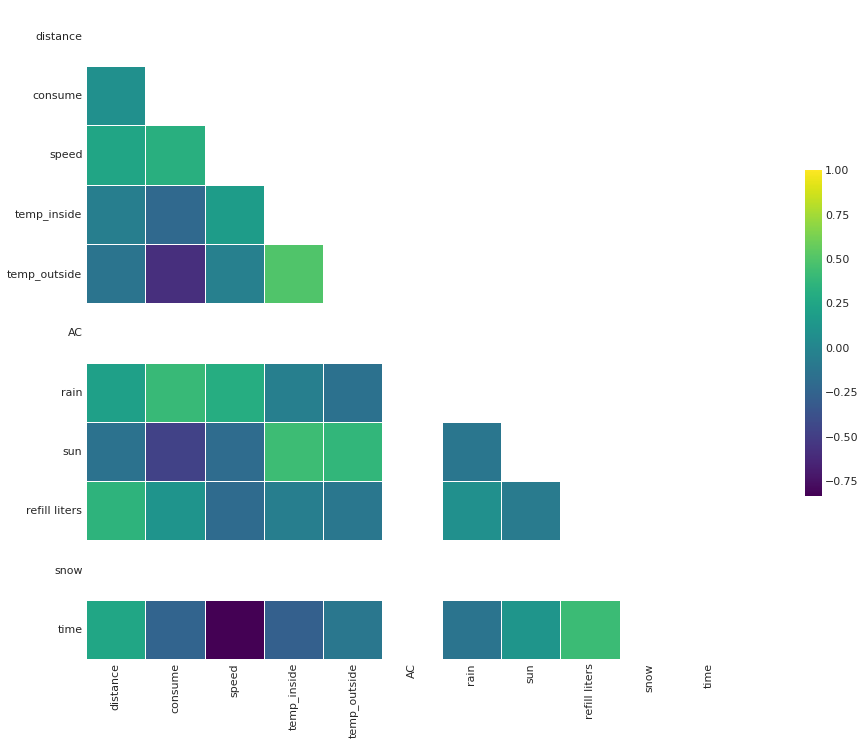

In [72]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

In [73]:
corr=df_ld.corr()
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,snow,time
distance,1.000000,0.262561,0.351326,0.140641,0.257790,-0.087224,0.213269,0.324093,0.259654,NaN,0.956523
consume,0.262561,1.000000,0.263742,-0.029504,-0.355177,-0.033192,0.049788,0.255743,0.547672,NaN,0.187993
speed,0.351326,0.263742,1.000000,-0.141454,0.122781,0.338875,0.151766,0.543100,-0.066528,NaN,0.081627
temp_inside,0.140641,-0.029504,-0.141454,1.000000,0.519457,0.253966,-0.265510,0.118593,0.253966,NaN,0.263628
temp_outside,0.257790,-0.355177,0.122781,0.519457,1.000000,0.177914,-0.348806,0.338408,-0.419035,NaN,0.260735
AC,-0.087224,-0.033192,0.338875,0.253966,0.177914,1.000000,-0.071429,0.681385,-0.071429,NaN,-0.153042
rain,0.213269,0.049788,0.151766,-0.265510,-0.348806,-0.071429,1.000000,-0.104828,-0.071429,NaN,0.180996
sun,0.324093,0.255743,0.543100,0.118593,0.338408,0.681385,-0.104828,1.000000,-0.104828,NaN,0.181657
refill liters,0.259654,0.547672,-0.066528,0.253966,-0.419035,-0.071429,-0.071429,-0.104828,1.000000,NaN,0.304410
snow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


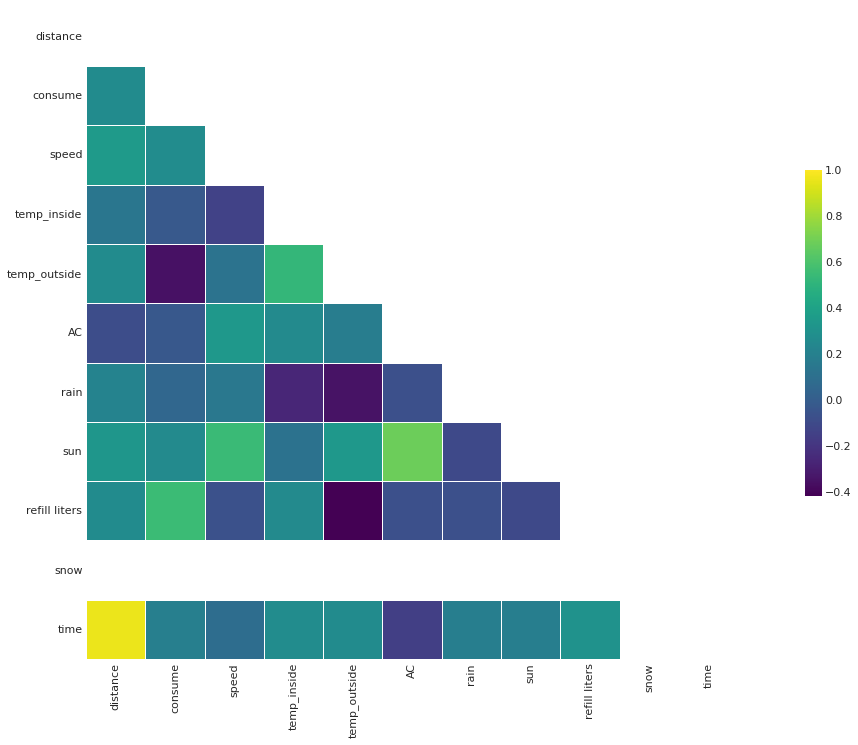

In [74]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);